In [57]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install scikit-learn

In [87]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [88]:
df = pd.read_csv('train.csv')
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [89]:
# check for null values
df.isnull().sum()

sms      0
label    0
dtype: int64

In [90]:
df['label'].value_counts()

label
0    4827
1     747
Name: count, dtype: int64

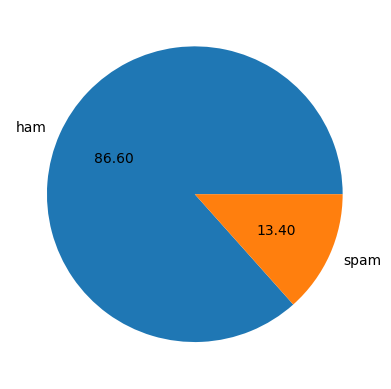

In [91]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'],autopct = "%0.2f")
plt.show()

In [92]:
X = df['sms']  
y = df['label']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [94]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [95]:
y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9856502242152466
Confusion Matrix:
[[949   5]
 [ 11 150]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       954
           1       0.97      0.93      0.95       161

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [96]:
import nltk

In [97]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [98]:
df['num_characters']= df['sms'].apply(len)

In [99]:
df.head()

,sms,label,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,112
1,Ok lar... Joking wif u oni...\n,0,30
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156
3,U dun say so early hor... U c already then say...,0,50
4,"Nah I don't think he goes to usf, he lives aro...",0,62


In [100]:
df['num_words']= df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))

In [101]:
df.head()

,sms,label,num_characters,num_words
0,"Go until jurong point, crazy.. Available only ...",0,112,24
1,Ok lar... Joking wif u oni...\n,0,30,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37
3,U dun say so early hor... U c already then say...,0,50,13
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15


In [102]:
df['num_sentences']= df['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [103]:
df.head()

,sms,label,num_characters,num_words,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2
1,Ok lar... Joking wif u oni...\n,0,30,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2
3,U dun say so early hor... U c already then say...,0,50,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1


In [104]:
df[['num_characters','num_words', 'num_sentences' ]].describe()

,num_characters,num_words,num_sentences
count,5574.000000,5574.000000,5574.000000
mean,81.478292,18.854324,2.005920
std,59.848302,13.838509,1.539876
min,3.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,63.000000,15.000000,2.000000
75%,123.000000,27.000000,3.000000
max,911.000000,220.000000,38.000000


In [105]:
df[df['label']== 0][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4827.000000,4827.000000,4827.000000
mean,72.471929,17.439196,1.845867
std,58.326643,14.104466,1.475264
min,3.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,94.000000,23.000000,2.000000
max,911.000000,220.000000,38.000000


In [106]:
df[df['label']== 1][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,139.676037,27.998661,3.040161
std,28.871250,6.855361,1.548499
min,14.000000,2.000000,1.000000
25%,134.000000,25.000000,2.000000
50%,150.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [107]:
pip install seaborn

In [108]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

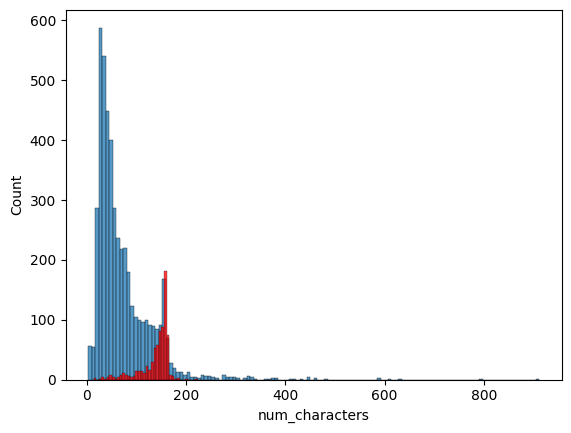

In [109]:
sns.histplot(df[df['label']== 0]['num_characters'])
sns.histplot(df[df['label']== 1]['num_characters'], color='red')

In [110]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [111]:
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    # convert to lowercase
    text = text.lower()
    # remove special characters
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # remove stopwords
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

In [112]:
# clean the messages
df['clean_text'] = df['sms'].apply(clean_text)
df.head()

,sms,label,num_characters,num_words,num_sentences,clean_text
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...\n,0,30,8,2,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,50,13,1,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1,nah think goes usf lives around though


In [113]:
X = df['clean_text']
y = df['label']

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

def classify(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    
#     cv_score = cross_val_score(model, X, y, cv=5)
#     print("CV Score:", np.mean(cv_score)*100)
    y_pred = pipeline_model.predict(x_test)
    print(classification_report(y_test, y_pred))

In [115]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy: 97.05882352941177
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1207
           1       0.99      0.79      0.88       187

    accuracy                           0.97      1394
   macro avg       0.98      0.89      0.93      1394
weighted avg       0.97      0.97      0.97      1394



In [116]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model, X, y)

Accuracy: 96.84361549497848
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1207
           1       1.00      0.76      0.87       187

    accuracy                           0.97      1394
   macro avg       0.98      0.88      0.92      1394
weighted avg       0.97      0.97      0.97      1394



In [117]:
from sklearn.svm import SVC
model = SVC(C=3)
classify(model, X, y)

Accuracy: 98.42180774748924
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1207
           1       0.99      0.89      0.94       187

    accuracy                           0.98      1394
   macro avg       0.99      0.94      0.96      1394
weighted avg       0.98      0.98      0.98      1394



In [118]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy: 97.70444763271162
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1207
           1       1.00      0.83      0.91       187

    accuracy                           0.98      1394
   macro avg       0.99      0.91      0.95      1394
weighted avg       0.98      0.98      0.98      1394

